In [17]:
from imutils import build_montages
from imutils import paths
import argparse
import imutils

In [19]:
# https://www.pyimagesearch.com/2017/06/05/computing-image-colorfulness-with-opencv-and-python/
def image_colorfulness(image):
	# split the image into its respective RGB components
	(B, G, R) = cv2.split(image.astype("float"))
 
	# compute rg = R - G
	rg = np.absolute(R - G)
 
	# compute yb = 0.5 * (R + G) - B
	yb = np.absolute(0.5 * (R + G) - B)
 
	# compute the mean and standard deviation of both `rg` and `yb`
	(rbMean, rbStd) = (np.mean(rg), np.std(rg))
	(ybMean, ybStd) = (np.mean(yb), np.std(yb))
 
	# combine the mean and standard deviations
	stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
	meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
 
	# derive the "colorfulness" metric and return it
	return stdRoot + (0.3 * meanRoot)

In [20]:
DATASET_PATH = "F:/Acad/lc/apple_DC/iphone" # the dataset file or root folder path.
results = []
for imagePath in paths.list_images(DATASET_PATH):
	# load the image, resize it (to speed up computation), and
	# compute the colorfulness metric for the image
	image = cv2.imread(imagePath)
	image = imutils.resize(image, width=250)
	C = image_colorfulness(image)
 
	# display the colorfulness score on the image
	cv2.putText(image, "{:.2f}".format(C), (40, 40), 
		cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 255, 0), 3)
 
	# add the image and colorfulness metric to the results list
	results.append(C)

In [38]:
results=np.array(results)
ave = np.average(results)
print(ave)
print(np.max(results))
print(np.min(results))

9.421361811558926
11.804113951254342
6.6011017748369785


Text(-20, 9.321361811558926, 'average')

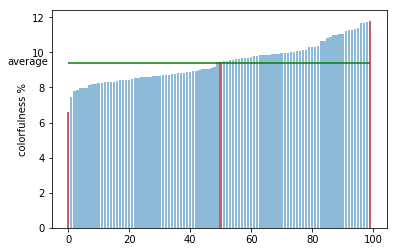

In [48]:
import matplotlib.pyplot as plt

results = np.sort(results)
n= len(results)
y_pos = np.arange(n)
plt.bar(y_pos, results, align='center', alpha=0.5)
plt.bar(0, np.min(results), align='center', alpha=0.5, color='red')
plt.bar(n-1, np.max(results), align='center', alpha=0.5, color='red')
plt.bar(n//2, np.median(results), align='center', alpha=0.5, color='red')
plt.hlines(ave, 0, n-1, colors='green', )
plt.ylabel("colorfulness %")
plt.text(-20, ave-.1 , "average", fontdict=None)